# Predicting Final Grade

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import (
    cross_validate,
    train_test_split,
)
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Introduction

Education remains one of the most vital and fundamental resources in the world. There is an active body of research that works to explore the relation between education and other societal factors such as economic growth where current research suggests that better education lends itself to better economic growth, and perhaps more importantly for individuals, a higher individual income (Roser & Ortiz-Ospina, 2016). 

There are many other reasons why people may care about their grade besides raw income. A student may want to get into a prestigious university where the entrance requirement is very high (of course, the underlying motivation could be income, but the current motivation is a top university). Alternatively, it may be as simple as getting the satisfaction of seeing a high mark on your report card. Being able to accurately predict your grade allows you to plan in advance to determine if you need extra assistance in a particular subject, or if you are currently on track to meet or exceed the grade you desire. Unfortunately, this is not an easy task. There are many potential factors that can affect your performance, and given that each student has their own unique circumstances, this makes the task of predicting monumental. On the other hand, there are also many features that are common among students, and helps serve as a common ground in being able to predict your final grade.

For this project, we're conducting a multi-variable regression analysis on the *Student Performance* dataset. The original dataset, which was recorded on the UCI ML Repo (see citation), was split into two individual datasets, respectively with students' final grades in Portuguese and Math. For this project, we're only focusing on the Math dataset. First used in 2008 by Cortez and Silva, this dataset was collected for use in decision trees, neural networks, SVMs and Random Forest. The dataset has an very large number of potentially useful features. There are 30 features and 3 outputs; however, for the purposes of this analysis, we will only focus on 9 features with varying levels of intuitive correlation with the final end of year grade G3, mostly consisting of social factors. For instance, the feature "study time", at a glance, seems like there will be a positive correlation with final grade while the feature "romantic" is not as straightforward to tell. 

The dataset we will be using contains the following features (the type of feature is given by the UCI ML Repo):
 * study time: The number of hours spend studying per week. It is a numeric feature where each number is associated with a range of hours spent studying (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours).
 * Pstatus: Whether the parents of the student are currently living together or seperated (Binary feature: T = living together, A = apart)
 * Medu: Numeric representations of the mother's education level  (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
 * Fedu: Numeric representations of the father's education level  (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
 * Mjob: The mother's job (Categorical: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
 * Fjob: The father's job (Categorical: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
 * goout: A representation of how often the student goes out with friends (numeric: from 1 - very low to 5 - very high)
 * travel time: how long it takes to get to school (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
 * romantic: Whether or not the student is in a romantic relationship (Binary: yes and no)
 * G3: The final grade of the student at the end of the year represented by a 0-20 scale (numeric: from 0-20 where 0 represents 0-5% and 20 represents 95-100%)
 
Thus, we are interested in looking to answer the following question: **Can we predict a student's final grade (denoted by "G3" in the dataset) given the above features**.


## Exploratory Data Analysis

In [139]:
df = pd.read_csv("data/student-mat.csv",sep = ";")
pd.set_option("display.max_rows", 10, "display.max_columns", None)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Since we have quite a few (namely, 30) variables to choose from, we first make a simple scatterplot to see how our target (G3) looks like comparing to a numerical variable(study time)

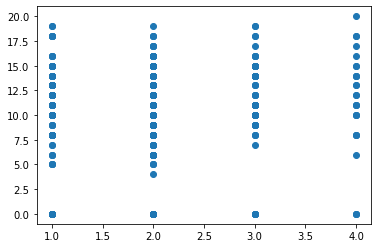

In [140]:
plt.scatter(df.studytime, df.G3)


## Methods

Since what we are trying to predict is a quantitative varible based on several variables, it is clear we are aiming for regression analysis. Particularly, the regresion methods from DSCI 110 were knn and least square, where we think the best of the two may be least squares regression. This is namely due to the fact that we hueristically expect quite linear result from many of these variables. 
 Since we will be only using a specific subset of the varibales use in the dataset then we need not explain all variables possibles in the dataset and rather explain why we are choosing the variables we are. 


In [141]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state=100)

#make training and testing split
desiredfeatures = ["studytime", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "goout","romantic","traveltime"]
X_train = train_df[desiredfeatures]
y_train = train_df["G3"]

X_test = test_df[desiredfeatures]
y_test = test_df["G3"]


#preprocess the data to make sure the scaling is correct and the categorical variables are encoded properly
numeric_features = ["studytime", "Medu", "Fedu", "goout", "traveltime"]
categorical_features = ["Mjob", "Fjob"]
binary_features = ["Pstatus", "romantic"]

preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numeric_features), 
    (make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"), OneHotEncoder(handle_unknown="ignore", sparse=False)), categorical_features),
    (make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(drop="if_binary", dtype=int)), binary_features),
)


In [142]:
#create the pipeline to preprocess our data and apply linear regression
pipelr = make_pipeline(preprocessor, Ridge())

#check crossvalidation scores using RMSE error
scores = cross_validate(
    pipelr, X_train, y_train, return_train_score=True, scoring = "neg_root_mean_squared_error"
)


print("The average cross-validation score was:", scores["test_score"].mean())


pd.DataFrame(scores)

The average cross-validation score was: -4.6610094069479615


,fit_time,score_time,test_score,train_score
0,0.011001,0.006997,-4.962635,-4.291163
1,0.011498,0.005504,-4.441621,-4.460115
2,0.011499,0.006000,-5.062048,-4.297265
3,0.011498,0.006000,-4.469512,-4.449754
4,0.011498,0.005500,-4.369231,-4.462157


## Results


...

In [143]:
pipelr.fit(X_train, y_train)

predicted = pipelr.predict(X_test)
rms = mean_squared_error(y_test, predicted, squared=False)
print(rms)

3.881244067605028


Text(0, 0.5, 'predicted grade')

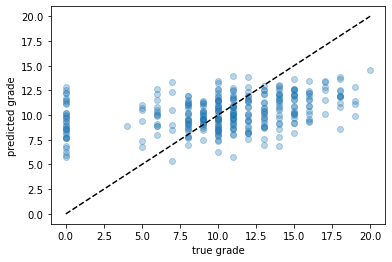

In [144]:
plt.scatter(y_train, pipelr.predict(X_train), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, "--k")
plt.xlabel("true grade")
plt.ylabel("predicted grade")

In [145]:
ohe_columns = list(
    preprocessor.named_transformers_["pipeline-2"]
    .named_steps["onehotencoder"]
    .get_feature_names(categorical_features)
)

ohe_columns2 = list(
    preprocessor.named_transformers_["pipeline-3"]
    .named_steps["onehotencoder"]
    .get_feature_names(binary_features)
)
new_columns = numeric_features + ohe_columns + ohe_columns2
df_coeff = pd.DataFrame(
    data={
        "features": new_columns,
        "coefficients": pipelr.named_steps["ridge"].coef_,
    }
)

C:\Users\danie\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [146]:
df_coeff.sort_values("coefficients",ascending=False)

,features,coefficients
6,Mjob_health,1.163407
14,Fjob_teacher,1.095221
1,Medu,0.876567
8,Mjob_services,0.470542
0,studytime,0.340212
...,...,...
9,Mjob_teacher,-0.594483
3,goout,-0.642844
5,Mjob_at_home,-0.679095
15,Pstatus_T,-0.845091


## Discussion:

Using the 9 features we presented above, we were able to create a linear regression model with an RMSE error of 3.88. Given the scale of the target variable (G3) is 0-20, we find that this error is very high; therefore, we find that using features predominately consisting on demographic and social factors would not lend itself well to accurately predicting grade. This can be interpreted as a positive outcome, as it suggests that your performance in school is only mildly impacted by demographic (e.g. parent job) and social (e.g. romantic) factors, which means more emphasis is likely placed on how much effort you apply to the course. 

When examining the coefficients, this does reflect some of the finding found by Pritchard & Wilson (2003), as they found that parent's education seemed to be one of the most influential factors in predicting high grades as we see that mother's education is the third highest predictor of high grades. On the other hand, we see that this is only true of the mother's education, since the father's education level seems to be quite unimpactful. 

A future question we could ask using this dataset is how effective pure academic features such as study time and number of classes failed perform when trying to predict final grade. We see that study time, while we intuitively thought would have a major positive correlation with high grades, is only the 5th highest coefficient. This suggests that it is quite possible that demographic and social factors may have a higher impact than we see from this report, such that it is absolutely required that we look at social, demographic, and academic factors at the same time. Is academic factors dominant in predicting grade or does demographic and social factors have a higher impact than it seems?


## Citations

Cortez, P. (2014). Student Performance. UCI Machine Learning Repository.

Cortez,  P.,  &  Silva, A.  (2008).  Using  data  mining  to  predict  secondary school  student  performance.  15th European Concurrent Engineering Conference 2008,  ECEC 2008 - 5th  Future Business Technology Conference, FUBUTEC 2008, 2003(2000), 5–12. 

Roser, M., & Ortiz-Ospina, E., (2016) - "Global Education". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/global-education' [Online Resource]

Pritchard, M. E., & Wilson, Gregory S. (Gregory Scott). (2003). Using emotional and social factors to predict student success. Journal of College Student Development, 44(1), 18-28. https://doi.org/10.1353/csd.2003.0008